# 3장. 기초를 넘어서: 이미지에서 특징 감지하기

<table align="left">
    <tr>
        <td>
            <a href="https://colab.research.google.com/github/rickiepark/aiml4coders/blob/main/ch03/03-beyond-the-basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
        </td>
    </tr>
</table>

## 합성곱 신경망 만들기

In [1]:
import tensorflow as tf

In [2]:
data = tf.keras.datasets.fashion_mnist

(training_images, training_labels), (test_images, test_labels) = data.load_data()

In [3]:
training_images = training_images.reshape(60000, 28, 28, 1)
training_images = training_images / 255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images = test_images / 255.0

In [4]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', 
                           input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

2022-02-27 12:11:02.689492: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [5]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [6]:
model.fit(training_images, training_labels, epochs=50)

Epoch 1/50
1875/1875 [==============================] - 29s 15ms/step - loss: 0.4312 - accuracy: 0.8451
Epoch 2/50
1875/1875 [==============================] - 28s 15ms/step - loss: 0.2897 - accuracy: 0.8930
Epoch 3/50
1875/1875 [==============================] - 29s 15ms/step - loss: 0.2442 - accuracy: 0.9094
Epoch 4/50
1875/1875 [==============================] - 29s 15ms/step - loss: 0.2137 - accuracy: 0.9209
Epoch 5/50
1875/1875 [==============================] - 28s 15ms/step - loss: 0.1873 - accuracy: 0.9291
Epoch 6/50
1875/1875 [==============================] - 28s 15ms/step - loss: 0.1643 - accuracy: 0.9380
Epoch 7/50
1875/1875 [==============================] - 29s 15ms/step - loss: 0.1443 - accuracy: 0.9456
Epoch 8/50
1875/1875 [==============================] - 28s 15ms/step - loss: 0.1247 - accuracy: 0.9532
Epoch 9/50
1875/1875 [==============================] - 28s 15ms/step - loss: 0.1111 - accuracy: 0.9585
Epoch 10/50
1875/1875 [==============================] - 28s 15m

In [7]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 2s 6ms/step - loss: 0.8608 - accuracy: 0.9057


[0.8608232140541077, 0.9057000279426575]

In [8]:
classifications = model.predict(test_images)
print(classifications[0])
print(test_labels[0])

[0.0000000e+00 0.0000000e+00 2.3307458e-36 0.0000000e+00 0.0000000e+00
 2.6584669e-36 0.0000000e+00 2.6721808e-30 0.0000000e+00 1.0000000e+00]
9


## 합성곱 신경망 살펴 보기

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 128)               2

## 말과 사람을 구별하는 CNN 만들기

### 케라스 ImageDataGenerator

In [10]:
import urllib.request
import zipfile

url = "https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip"
file_name = "horse-or-human.zip"
training_dir = 'horse-or-human/training/'
urllib.request.urlretrieve(url, file_name)

zip_ref = zipfile.ZipFile(file_name, 'r')
zip_ref.extractall(training_dir)
zip_ref.close()

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 전체 이미지를 1./255로 스케일을 조정합니다.
train_datagen = ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow_from_directory(
    training_dir,
    target_size=(300, 300),
    class_mode='binary'
)

Found 1027 images belonging to 2 classes.


### 말-사람 데이터셋을 위한 CNN 구조

In [12]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', 
                           input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [13]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 149, 149, 16)     0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 147, 147, 32)      4640      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 73, 73, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 71, 71, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 35, 35, 64)      

In [14]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=0.001),
              metrics=['accuracy'])

In [15]:
model.fit(train_generator, epochs=15)

Epoch 1/5
33/33 [==============================] - 29s 863ms/step - loss: 0.8010 - accuracy: 0.6592
Epoch 2/5
33/33 [==============================] - 28s 851ms/step - loss: 0.3979 - accuracy: 0.8393
Epoch 3/5
33/33 [==============================] - 28s 837ms/step - loss: 0.4229 - accuracy: 0.8978
Epoch 4/5
33/33 [==============================] - 28s 835ms/step - loss: 0.1257 - accuracy: 0.9474
Epoch 5/5
33/33 [==============================] - 28s 826ms/step - loss: 0.2640 - accuracy: 0.9231


#### `image_dataset_from_directory` 사용하기

In [ ]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    training_dir,
    image_size=(300, 300),
    label_mode='binary'
)

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Rescaling(1./255, input_shape=(300, 300, 3)),
    tf.keras.layers.Conv2D(16, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=0.001),
              metrics=['accuracy'])

In [ ]:
model.fit(train_ds, epochs=15)

### 검증 세트 추가하기

In [16]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', 
                           input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [17]:
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=0.001),
              metrics=['accuracy'])

In [18]:
validation_url = "https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip"

validation_file_name = "validation-horse-or-human.zip"
validation_dir = 'horse-or-human/validation/'
urllib.request.urlretrieve(validation_url, validation_file_name)

zip_ref = zipfile.ZipFile(validation_file_name, 'r')
zip_ref.extractall(validation_dir)
zip_ref.close()

In [19]:
validation_datagen = ImageDataGenerator(rescale=1/255)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(300, 300),
    class_mode='binary'
)

Found 256 images belonging to 2 classes.


In [20]:
model.fit(train_generator,
          epochs=15,
          validation_data=validation_generator)

Epoch 1/5
33/33 [==============================] - 30s 887ms/step - loss: 1.3748 - accuracy: 0.6329 - val_loss: 2.8709 - val_accuracy: 0.5195
Epoch 2/5
33/33 [==============================] - 29s 878ms/step - loss: 0.4811 - accuracy: 0.8471 - val_loss: 0.9738 - val_accuracy: 0.8594
Epoch 3/5
33/33 [==============================] - 29s 878ms/step - loss: 0.2228 - accuracy: 0.9260 - val_loss: 2.9998 - val_accuracy: 0.7969
Epoch 4/5
33/33 [==============================] - 29s 909ms/step - loss: 0.1849 - accuracy: 0.9357 - val_loss: 0.3993 - val_accuracy: 0.8906
Epoch 5/5
33/33 [==============================] - 29s 880ms/step - loss: 0.3102 - accuracy: 0.9552 - val_loss: 1.3308 - val_accuracy: 0.8555


### 모델 실행하기

코랩을 사용하는 경우 아래 셀에서 직접 이미지를 업로드할 수 있습니다.

In [21]:
import sys

# 코랩을 사용중인지 확인합니다.
if 'google.colab' in sys.modules:
    from google.colab import files
    uploaded = files.upload()
    sample_images = ['/content/' + fn for fn in uploaded.keys()]

    # 업로드된 파일이 없으면 깃허브에서 다운로드합니다.
    if len(uploaded) < 1:
        import gdown
        base_url = 'https://github.com/rickiepark/aiml4coders/raw/main/ch03/'
        for i in range(1,4):
            gdown.download(base_url + 'hh_image_{}.jpg'.format(i))
        sample_images = ['/content/hh_image_{}.jpg'.format(i) for i in range(1,4)]

# 로컬 컴퓨터면 ch03 폴더에 있는 이미지를 사용합니다.
else:
    sample_images = ['hh_image_{}.jpg'.format(i) for i in range(1,4)]

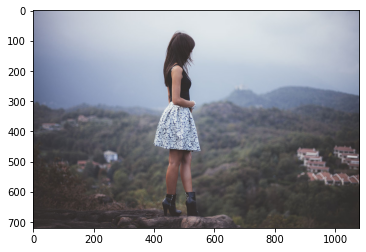

모델 출력: 1.0
hh_image_1.jpg는 사람입니다.
--------------------


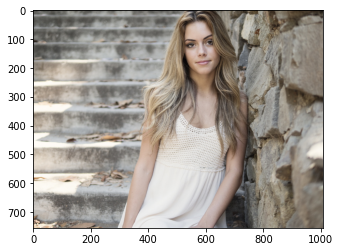

모델 출력: 0.0
hh_image_2.jpg는 말입니다.
--------------------


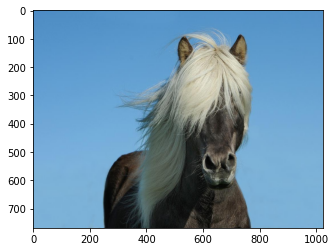

모델 출력: 0.0
hh_image_3.jpg는 말입니다.
--------------------


In [22]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.preprocessing import image

for fn in sample_images:
    # 이미지 출력
    plt.imshow(mpimg.imread(fn))
    plt.show()
    
    # 이미지 불러오기
    img = image.load_img(fn, target_size=(300, 300))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)

    classes = model.predict(x)

    print('모델 출력:', classes[0][0])
    if classes[0][0] > 0.5:
        print(fn + "는 사람입니다.")
    else:
        print(fn + "는 말입니다.")
    print('--------------------')

## 이미지 증식

In [23]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', 
                           input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [24]:
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=0.001),
              metrics=['accuracy'])

In [25]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = train_datagen.flow_from_directory(
    training_dir,
    target_size=(300, 300),
    class_mode='binary'
)

Found 1027 images belonging to 2 classes.


In [26]:
model.fit(train_generator,
          epochs=15,
          validation_data=validation_generator)

Epoch 1/5
33/33 [==============================] - 41s 1s/step - loss: 0.7445 - accuracy: 0.5122 - val_loss: 0.7070 - val_accuracy: 0.5000
Epoch 2/5
33/33 [==============================] - 40s 1s/step - loss: 0.6178 - accuracy: 0.6835 - val_loss: 1.1041 - val_accuracy: 0.5000
Epoch 3/5
33/33 [==============================] - 40s 1s/step - loss: 0.5944 - accuracy: 0.7644 - val_loss: 1.2047 - val_accuracy: 0.5625
Epoch 4/5
33/33 [==============================] - 40s 1s/step - loss: 0.4482 - accuracy: 0.7936 - val_loss: 0.8332 - val_accuracy: 0.6758
Epoch 5/5
33/33 [==============================] - 40s 1s/step - loss: 0.4608 - accuracy: 0.8208 - val_loss: 4.6026 - val_accuracy: 0.5000


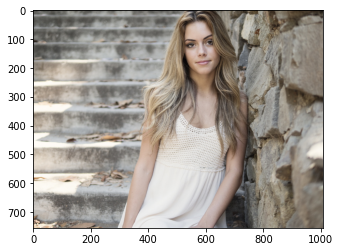

모델 출력: 1.0
hh_image_2.jpg는 사람입니다.


In [27]:
fn = sample_images[1]
plt.imshow(mpimg.imread(fn))
plt.show()

# 이미지 불러오기
img = image.load_img(fn, target_size=(300, 300))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

classes = model.predict(x)

print('모델 출력:', classes[0][0])
if classes[0][0] > 0.5:
    print(fn + "는 사람입니다.")
else:
    print(fn + "는 말입니다.")

#### `image_dataset_from_directory` 사용하기

In [ ]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    training_dir,
    image_size=(300, 300),
    label_mode='binary'
)

validation_ds = tf.keras.utils.image_dataset_from_directory(
    validation_dir,
    image_size=(300, 300),
    label_mode='binary'
)

In [23]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Rescaling(1./255, input_shape=(300, 300, 3)),
    tf.keras.layers.RandomRotation(0.11, fill_mode='nearest'),
    tf.keras.layers.RandomTranslation(0.2, 0.2, fill_mode='nearest'),
    tf.keras.layers.RandomZoom(0.2, fill_mode='nearest'),
    tf.keras.layers.RandomFlip('horizontal'),
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=0.001),
              metrics=['accuracy'])

model.fit(train_ds,
          epochs=15,
          validation_data=validation_ds)

In [ ]:
fn = sample_images[1]
plt.imshow(mpimg.imread(fn))
plt.show()

# 이미지 불러오기
img = image.load_img(fn, target_size=(300, 300))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

classes = model.predict(x)

print('모델 출력:', classes[0][0])
if classes[0][0] > 0.5:
    print(fn + "는 사람입니다.")
else:
    print(fn + "는 말입니다.")

## 전이 학습

In [28]:
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3

weights_url = "https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5"
weights_file = "inception_v3.h5"
urllib.request.urlretrieve(weights_url, weights_file)
pre_trained_model = InceptionV3(input_shape=(150, 150, 3),
                                include_top=False,
                                weights=None)
pre_trained_model.load_weights(weights_file)

In [29]:
pre_trained_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_17 (Conv2D)             (None, 74, 74, 32)   864         ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 74, 74, 32)  96          ['conv2d_17[0][0]']              
 alization)                                                                                       
                                                                                       

In [30]:
for layer in pre_trained_model.layers:
    layer.trainable = False

last_layer = pre_trained_model.get_layer('mixed7')
print('마지막 층의 출력 크기: ', last_layer.output_shape)
last_output = last_layer.output

마지막 층의 출력 크기:  (None, 7, 7, 768)


In [31]:
# 출력을 펼쳐서 1차원으로 만듭니다.
x = layers.Flatten()(last_output)
# 1,204개 은닉 유닛과 렐루 활성화 함수를 사용한 완전 연결 층을 추가합니다.
x = layers.Dense(1024, activation='relu')(x)
# 분류를 위해 시그모이드 함수를 사용하는 최종 층을 추가합니다.
x = layers.Dense(1, activation='sigmoid')(x)

In [32]:
model = Model(pre_trained_model.input, x)

model.compile(optimizer=RMSprop(learning_rate=0.0001),
              loss='binary_crossentropy',
              metrics=['acc'])

In [33]:
train_generator = train_datagen.flow_from_directory(
    training_dir,
    batch_size=20,
    class_mode='binary',
    target_size=(150, 150)
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    class_mode='binary'
)

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


In [34]:
model.fit(train_generator,
          epochs=40,
          validation_data=validation_generator)

Epoch 1/5
52/52 [==============================] - 26s 424ms/step - loss: 0.1772 - acc: 0.9435 - val_loss: 0.0116 - val_acc: 0.9961
Epoch 2/5
52/52 [==============================] - 19s 366ms/step - loss: 0.0241 - acc: 0.9932 - val_loss: 0.0013 - val_acc: 1.0000
Epoch 3/5
52/52 [==============================] - 19s 369ms/step - loss: 0.0229 - acc: 0.9912 - val_loss: 0.0012 - val_acc: 1.0000
Epoch 4/5
52/52 [==============================] - 20s 372ms/step - loss: 0.0236 - acc: 0.9883 - val_loss: 0.0298 - val_acc: 0.9922
Epoch 5/5
52/52 [==============================] - 19s 366ms/step - loss: 0.0274 - acc: 0.9932 - val_loss: 0.0088 - val_acc: 0.9922


dogs-vs-cats 데이터셋을 사용한 예제는 원서 깃허브에 있는 [transfer_learning-cats-dogs.ipynb](https://github.com/lmoroney/tfbook/blob/master/chapter3/transfer_learning-cats-dogs.ipynb) 노트북을 참고하세요.

## 다중 분류

In [35]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip \
    -O ./rps.zip

--2022-02-27 12:45:04--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 34.64.4.16, 34.64.4.48, 34.64.4.80, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|34.64.4.16|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 200682221 (191M) [application/zip]
Saving to: ‘./rps.zip’

./rps.zip           100%[===================>] 191.38M   101MB/s    in 1.9s    

2022-02-27 12:45:07 (101 MB/s) - ‘./rps.zip’ saved [200682221/200682221]



In [36]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip \
    -O ./rps-test-set.zip

--2022-02-27 12:45:08--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 34.64.4.80, 34.64.4.112, 34.64.4.16, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|34.64.4.80|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29516758 (28M) [application/zip]
Saving to: ‘./rps-test-set.zip’

./rps-test-set.zip  100%[===================>]  28.15M  --.-KB/s    in 0.1s    

2022-02-27 12:45:09 (196 MB/s) - ‘./rps-test-set.zip’ saved [29516758/29516758]



In [37]:
local_zip = './rps.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./')
zip_ref.close()

TRAINING_DIR = "./rps/"
training_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

local_zip = './rps-test-set.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./')
zip_ref.close()

VALIDATION_DIR = "./rps-test-set/"
validation_datagen = ImageDataGenerator(rescale = 1./255)

In [38]:
train_generator = training_datagen.flow_from_directory(
    TRAINING_DIR,
    target_size=(150,150),
    class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
    VALIDATION_DIR,
    target_size=(150,150),
    class_mode='categorical'
)

Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.


In [39]:
model = tf.keras.models.Sequential([
    # 입력 크기는 원하는 이미지(150x150, 3채널)와 맞아야 합니다.
    # 첫 번째 합성곱 층
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', 
                           input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    # 두 번째 합성곱 층
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    # 세 번째 합성곱 층
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    # 네 번째 합성곱 층
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    # 밀집 층에 전달하가 위해 펼칩니다.
    tf.keras.layers.Flatten(),
    # 512개 뉴런을 가진 은닉층
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [40]:
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', 
              metrics=['accuracy'])

In [41]:
model.fit(train_generator, 
          epochs=25, 
          validation_data=validation_generator)

Epoch 1/5
79/79 [==============================] - 52s 640ms/step - loss: 1.2278 - accuracy: 0.4087 - val_loss: 1.1860 - val_accuracy: 0.3333
Epoch 2/5
79/79 [==============================] - 50s 630ms/step - loss: 0.8330 - accuracy: 0.6151 - val_loss: 0.7431 - val_accuracy: 0.6022
Epoch 3/5
79/79 [==============================] - 50s 629ms/step - loss: 0.5343 - accuracy: 0.7802 - val_loss: 0.2516 - val_accuracy: 0.8387
Epoch 4/5
79/79 [==============================] - 50s 636ms/step - loss: 0.3007 - accuracy: 0.8829 - val_loss: 0.0994 - val_accuracy: 0.9704
Epoch 5/5
79/79 [==============================] - 51s 638ms/step - loss: 0.2336 - accuracy: 0.9111 - val_loss: 0.2725 - val_accuracy: 0.8710


In [42]:
# 코랩을 사용중인지 확인합니다.
if 'google.colab' in sys.modules:
    from google.colab import files
    uploaded = files.upload()
    sample_images = ['/content/' + fn for fn in uploaded.keys()]

    # 업로드된 파일이 없으면 깃허브에서 다운로드합니다.
    if len(uploaded) < 1:
        import gdown
        base_url = 'https://github.com/rickiepark/aiml4coders/raw/main/ch03/'
        for i in range(1,4):
            gdown.download(base_url + 'rsp_image_{}.jpg'.format(i))
        sample_images = ['/content/rsp_image_{}.jpg'.format(i) for i in range(1,4)]

# 로컬 컴퓨터면 ch03 폴더에 있는 이미지를 사용합니다.
else:
    sample_images = ['rsp_image_{}.jpg'.format(i) for i in range(1,4)]

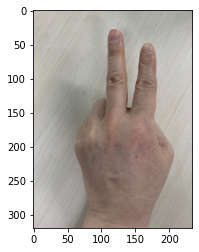

rsp_image_1.jpg는 가위입니다.


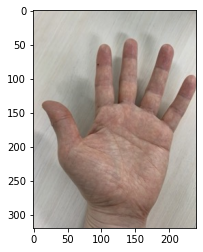

rsp_image_2.jpg는 보입니다.


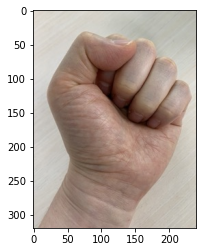

rsp_image_3.jpg는 바위입니다.


In [43]:
rsp_name = ['보', '바위', '가위']

for fn in sample_images:
    # 이미지 출력
    plt.imshow(mpimg.imread(fn))
    plt.show()
    
    # 이미지 불러오기
    img = image.load_img(fn, target_size=(150, 150))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)

    classes = model.predict(x)

    idx = np.argmax(classes[0])
    print(fn + "는 {}입니다.".format(rsp_name[idx]))

## 드롭아웃 규제

In [44]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(256, activation=tf.nn.relu),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(64, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(training_images, training_labels, 
          validation_data=(test_images, test_labels),
          epochs=20)

Epoch 1/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4873 - accuracy: 0.8245 - val_loss: 0.4172 - val_accuracy: 0.8526
Epoch 2/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3696 - accuracy: 0.8633 - val_loss: 0.3836 - val_accuracy: 0.8591
Epoch 3/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3304 - accuracy: 0.8786 - val_loss: 0.3672 - val_accuracy: 0.8659
Epoch 4/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3061 - accuracy: 0.8863 - val_loss: 0.3520 - val_accuracy: 0.8772
Epoch 5/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2883 - accuracy: 0.8922 - val_loss: 0.3431 - val_accuracy: 0.8799
Epoch 6/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2739 - accuracy: 0.8968 - val_loss: 0.3453 - val_accuracy: 0.8782
Epoch 7/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2604 - accuracy: 0.9015 - val_loss: 0.3291 - val_accuracy:

In [45]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(256, activation=tf.nn.relu),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation=tf.nn.relu),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(training_images, training_labels, 
          validation_data=(test_images, test_labels),
          epochs=20)

model.evaluate(test_images, test_labels)

Epoch 1/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5898 - accuracy: 0.7886 - val_loss: 0.4340 - val_accuracy: 0.8452
Epoch 2/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4331 - accuracy: 0.8452 - val_loss: 0.4044 - val_accuracy: 0.8589
Epoch 3/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3938 - accuracy: 0.8600 - val_loss: 0.3965 - val_accuracy: 0.8628
Epoch 4/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3736 - accuracy: 0.8646 - val_loss: 0.3891 - val_accuracy: 0.8587
Epoch 5/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3564 - accuracy: 0.8709 - val_loss: 0.3538 - val_accuracy: 0.8732
Epoch 6/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3456 - accuracy: 0.8746 - val_loss: 0.3712 - val_accuracy: 0.8694
Epoch 7/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3316 - accuracy: 0.8799 - val_loss: 0.3458 - val_accuracy:

[0.3240543603897095, 0.8870999813079834]